This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [2]:
# Relative Risk with PTS
lead = 12
obs = 1

data = pd.read_csv("../csv/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs_dataset_no_pts.csv".format(lead, obs, lead, obs), low_memory=False)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    106.0  69.0           78.0            78.0   
1             151708      1   1287.0  79.0           38.0            38.0   
2             152171      1   1660.0  84.0           38.0            38.0   
3             155126      1   2801.0  71.0           65.0            65.0   
4             156970      1  17279.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
19651        3352487      0    240.0  60.0           45.0            45.0   
19652        3352563      0    203.0  34.0           54.0            54.0   
19653        3352747      0    526.0  30.0           31.0            31.0   
19654        3353044      0   2678.0  52.0           41.0            41.0   
19655        3353077      0   4010.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  1.0                4.0      2.0               0  ...   
1                  1.0                4.0      4.0               1  ...   
2                  0.0                4.0      2.0               0  ...   
3                  0.0                4.0      4.0               1  ...   
4                  1.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
19651              0.0                4.0      4.0               0  ...   
19652              1.0                4.0      2.0               0  ...   
19653              1.0                4.0      4.0               0  ...   
19654              1.0                4.0      2.0               0  ...   
19655              1.0                4.0      4.0               0  ...   

      comorbidity_alcohol comorbidity_drug comorbidity_depre last_24hr_urine  \
0                     NaN              NaN               NaN             NaN   
1                     0.0              0.0               0.0           100.0   
2                     0.0              0.0               0.0             NaN   
3                     0.0              0.0               0.0             NaN   
4                     1.0              0.0               0.0          2920.0   
...                   ...              ...               ...             ...   
19651                 NaN              NaN               NaN          1770.0   
19652                 0.0              0.0               0.0           300.0   
19653                 0.0              0.0               0.0          1050.0   
19654                 0.0              0.0               0.0          2825.0   
19655                 0.0              0.0               0.0          2590.0   

      tranfuse_rbc tranfuse_plasma tranfuse_platelet dialysis  surgical  \
0                0               0                 0        1         0   
1                0               0                 0        0         0   
2                0               0                 0        0         1   
3                1               0                 0        0         1   
4                0               0                 0        0         0   
...            ...             ...               ...      ...       ...   
19651            0               0                 0        0         1   
19652            0               0                 0        0         0   
19653            0               0                 0        0         0   
19654            0               0                 0        0         0   
19655            0               0                 0        0         1   

       mv_duration  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
19651          0.0  
19652          0.0  
19653          0.0  
19654          0.0  
19655          0.0  

[19656 rows x 267 columns]

In [3]:
for col in data.columns:
    print(col)
    print(missing_data(data, col))

PatientStayID
(0, 19656)
Class
(0, 19656)
LOS
(0, 19656)
Age
(0, 19656)
APACHEIVscore
(2261, 19656)
APACHEIVaScore
(2261, 19656)
UrgentAdmission
(514, 19656)
AdmissionCategory
(514, 19656)
NumBeds
(2003, 19656)
TeachingStatus
(0, 19656)
Gender
(0, 19656)
AdmitHeight
(0, 19656)
AdmitTime24
(0, 19656)
AdmitSource
(3328, 19656)
UnitType
(0, 19656)
UnitAdmitTime
(0, 19656)
UnitAdmitSource
(47, 19656)
AdmitWeight
(0, 19656)
HistAICD
(0, 19656)
HistAngina
(0, 19656)
HistArrythmia
(0, 19656)
HistCHF
(0, 19656)
HistCABG
(0, 19656)
HistHypertension
(0, 19656)
HistMI
(0, 19656)
HistPacemaker
(0, 19656)
HistPVD
(0, 19656)
HistPCI
(0, 19656)
HistPulmEmb
(0, 19656)
HistHeartTransp
(0, 19656)
HistValveDis
(0, 19656)
HistVenThromb
(0, 19656)
HistCushing
(0, 19656)
HistHypercalcemia
(0, 19656)
Histhyperthyroid
(0, 19656)
Histhypothyroid
(0, 19656)
Histdiabetes
(0, 19656)
HistSteroid Use
(0, 19656)
HistCirrhosis
(0, 19656)
HistHypersplenism
(0, 19656)
HistPUD
(0, 19656)
HistLiverTransp
(0, 19656)
HistA

In [4]:
data = process_all(data)
data["mv_duration_ratio"] = data["mv_duration"]/data["LOS"]
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    106.0  69.0           78.0            78.0   
1             151708      1   1287.0  79.0           38.0            38.0   
2             152171      1   1660.0  84.0           38.0            38.0   
3             155126      1   2801.0  71.0           65.0            65.0   
4             156970      1  17279.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
19651        3352487      0    240.0  60.0           45.0            45.0   
19652        3352563      0    203.0  34.0           54.0            54.0   
19653        3352747      0    526.0  30.0           31.0            31.0   
19654        3353044      0   2678.0  52.0           41.0            41.0   
19655        3353077      0   4010.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  1.0      2.0               0     1.0  ...   
1                  1.0      4.0               1     0.0  ...   
2                  0.0      2.0               0     1.0  ...   
3                  0.0      4.0               1     0.0  ...   
4                  1.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
19651              0.0      4.0               0     1.0  ...   
19652              1.0      2.0               0     1.0  ...   
19653              1.0      4.0               0     0.0  ...   
19654              1.0      2.0               0     0.0  ...   
19655              1.0      4.0               0     1.0  ...   

      UnitAdmitSource_Floor UnitAdmitSource_ICU  UnitAdmitSource_Missing  \
0                         0                   0                        0   
1                         0                   0                        0   
2                         0                   0                        0   
3                         0                   0                        0   
4                         0                   0                        0   
...                     ...                 ...                      ...   
19651                     0                   0                        0   
19652                     0                   0                        0   
19653                     0                   0                        0   
19654                     1                   0                        0   
19655                     0                   0                        0   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                       0                      0   
1                       0                      0   
2                       1                      0   
3                       1                      0   
4                       0                      0   
...                   ...                    ...   
19651                   0                      0   
19652                   0                      0   
19653                   0                      0   
19654                   0                      0   
19655                   0                      0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     0   
...                              ...                   ...   
19651                              0                     1   
19652                              0                     0   
19653                              0                     0   
19654                              0                     0   
19655                              0                     0   

       UnitAdmitSource_SDU  Ti

In [5]:
for col in data.columns:
    print(col)

PatientStayID
Class
LOS
Age
APACHEIVscore
APACHEIVaScore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistArrythmia
HistCHF
HistCABG
HistHypertension
HistMI
HistPacemaker
HistPVD
HistPCI
HistPulmEmb
HistHeartTransp
HistValveDis
HistVenThromb
HistCushing
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistSteroid Use
HistCirrhosis
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistIntracranialMass
HistNeuromuscularDis
HistSeizures
HistStrokes
HistTIA
HistAsthma
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistSarcoidosis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
HistRheumatic
relative_12hr_lead_1hr_obsAcetaminophen
relative_12hr_lead_1hr_

In [6]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    106.0  69.0           78.0            78.0   
1             151708      1   1287.0  79.0           38.0            38.0   
2             152171      1   1660.0  84.0           38.0            38.0   
3             155126      1   2801.0  71.0           65.0            65.0   
4             156970      1  17279.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
19651        3352487      0    240.0  60.0           45.0            45.0   
19652        3352563      0    203.0  34.0           54.0            54.0   
19653        3352747      0    526.0  30.0           31.0            31.0   
19654        3353044      0   2678.0  52.0           41.0            41.0   
19655        3353077      0   4010.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  1.0      2.0               0     1.0  ...   
1                  1.0      4.0               1     0.0  ...   
2                  0.0      2.0               0     1.0  ...   
3                  0.0      4.0               1     0.0  ...   
4                  1.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
19651              0.0      4.0               0     1.0  ...   
19652              1.0      2.0               0     1.0  ...   
19653              1.0      4.0               0     0.0  ...   
19654              1.0      2.0               0     0.0  ...   
19655              1.0      4.0               0     1.0  ...   

      UnitAdmitSource_Floor UnitAdmitSource_ICU  UnitAdmitSource_Missing  \
0                         0                   0                        0   
1                         0                   0                        0   
2                         0                   0                        0   
3                         0                   0                        0   
4                         0                   0                        0   
...                     ...                 ...                      ...   
19651                     0                   0                        0   
19652                     0                   0                        0   
19653                     0                   0                        0   
19654                     1                   0                        0   
19655                     0                   0                        0   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                       0                      0   
1                       0                      0   
2                       1                      0   
3                       1                      0   
4                       0                      0   
...                   ...                    ...   
19651                   0                      0   
19652                   0                      0   
19653                   0                      0   
19654                   0                      0   
19655                   0                      0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     0   
...                              ...                   ...   
19651                              0                     1   
19652                              0                     0   
19653                              0                     0   
19654                              0                     0   
19655                              0                     0   

       UnitAdmitSource_SDU  Ti

In [7]:
common_imputation= ["Gender", "UrgentAdmission", "TeachingStatus"]
for col in data.columns:
    if col.startswith("comorbidity_") or col.startswith("Hist"):
        common_imputation.append(col)
one_hot_removal = []
remove = ["APACHEIVaScore", "relative_{}hr_lead_{}hr_obsHaloperidol".format(lead, obs), "relative_{}hr_lead_{}hr_obsPrecedex".format(lead, obs), "ventilator", "vented", "UnitAdmitSource_Missing", "vasopressors"]#, "mean_motor_GCS", 

exceptions = []# ["UrgentAdmission"]

mean_imputation = data.columns
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [8]:
for col in data.columns:
    if col.startswith("count_"):
        data[col] = data[col].fillna(0)
    if col.startswith("diff_"):
        data[col] = data[col].fillna(0)


from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [9]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

19656


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
0           150934.0    106.0  69.0           78.0              1.0      2.0   
1           151708.0   1287.0  79.0           38.0              1.0      4.0   
2           152171.0   1660.0  84.0           38.0              0.0      2.0   
3           155126.0   2801.0  71.0           65.0              0.0      4.0   
4           156970.0  17279.0  56.0           32.0              1.0      4.0   
...              ...      ...   ...            ...              ...      ...   
19651      3352487.0    240.0  60.0           45.0              0.0      4.0   
19652      3352563.0    203.0  34.0           54.0              1.0      2.0   
19653      3352747.0    526.0  30.0           31.0              1.0      4.0   
19654      3353044.0   2678.0  52.0           41.0              1.0      2.0   
19655      3353077.0   4010.0  60.0           36.0              1.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
0                 0.0     1.0        152.4    74.800000  ...   
1                 1.0     0.0        175.3    70.800000  ...   
2                 0.0     1.0        165.1    84.362555  ...   
3                 1.0     0.0        165.1    83.200000  ...   
4                 1.0     0.0        167.6    90.500000  ...   
...               ...     ...          ...          ...  ...   
19651             0.0     1.0        168.0   118.600000  ...   
19652             0.0     1.0        172.7    81.600000  ...   
19653             0.0     0.0        167.6    62.600000  ...   
19654             0.0     0.0        175.0    52.000000  ...   
19655             0.0     1.0        165.1   120.600000  ...   

       UnitAdmitSource_EmergencyDep  UnitAdmitSource_Floor  \
0                               1.0                    0.0   
1                               0.0                    0.0   
2                               0.0                    0.0   
3                               0.0                    0.0   
4                               1.0                    0.0   
...                             ...                    ...   
19651                           0.0                    0.0   
19652                           1.0                    0.0   
19653                           0.0                    0.0   
19654                           0.0                    1.0   
19655                           1.0                    0.0   

       UnitAdmitSource_ICU  UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                      0.0                 0.0                    0.0   
1                      0.0                 0.0                    0.0   
2                      0.0                 1.0                    0.0   
3                      0.0                 1.0                    0.0   
4                      0.0                 0.0                    0.0   
...                    ...                 ...                    ...   
19651                  0.0                 0.0                    0.0   
19652                  0.0                 0.0                    0.0   
19653                  0.0                 0.0                    0.0   
19654                  0.0                 0.0                    0.0   
19655                  0.0                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                0.0                   0.0   
1                                0.0                   0.0   
2                                0.0                   0.0   
3                                0.0                   0.0   
4                                0.0                   0.0   
...                              ...                   ...   
19651                            0.0                   1.0   
19652                            0.0                   0.0   
19653                            0.0                   0.0   
19654                            0.

In [10]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID       LOS       Age  APACHEIVscore  UrgentAdmission  \
0           150934.0 -0.586920  0.342599       0.886114         0.401695   
1           151708.0 -0.254157  0.944296      -0.811775         0.401695   
2           152171.0 -0.149059  1.245144      -0.811775        -2.489450   
3           155126.0  0.172433  0.462938       0.334300        -2.489450   
4           156970.0  4.251807 -0.439607      -1.066459         0.401695   
...              ...       ...       ...            ...              ...   
19651      3352487.0 -0.549164 -0.198928      -0.514645        -2.489450   
19652      3352563.0 -0.559589 -1.763339      -0.132619         0.401695   
19653      3352747.0 -0.468579 -2.004018      -1.108906         0.401695   
19654      3353044.0  0.137776 -0.680285      -0.684434         0.401695   
19655      3353077.0  0.513085 -0.198928      -0.896670         0.401695   

        NumBeds  TeachingStatus    Gender  AdmitHeight   AdmitWeight  ...  \
0     -1.651783       -0.745852  1.054710    -1.046518 -3.547232e-01  ...   
1      0.871489        1.340749 -0.948128     0.408323 -5.031033e-01  ...   
2     -1.651783       -0.745852  1.054710    -0.239685 -5.271520e-16  ...   
3      0.871489        1.340749 -0.948128    -0.239685 -4.312501e-02  ...   
4      0.871489        1.340749 -0.948128    -0.080860  2.276687e-01  ...   
...         ...             ...       ...          ...           ...  ...   
19651  0.871489       -0.745852  1.054710    -0.055448  1.270039e+00  ...   
19652 -1.651783       -0.745852  1.054710     0.243144 -1.024771e-01  ...   
19653  0.871489       -0.745852 -0.948128    -0.080860 -8.072826e-01  ...   
19654 -1.651783       -0.745852 -0.948128     0.389264 -1.200490e+00  ...   
19655  0.871489       -0.745852  1.054710    -0.239685  1.344229e+00  ...   

       UnitAdmitSource_EmergencyDep  UnitAdmitSource_Floor  \
0                          1.010639              -0.465525   
1                         -0.989473              -0.465525   
2                         -0.989473              -0.465525   
3                         -0.989473              -0.465525   
4                          1.010639              -0.465525   
...                             ...                    ...   
19651                     -0.989473              -0.465525   
19652                      1.010639              -0.465525   
19653                     -0.989473              -0.465525   
19654                     -0.989473               2.148114   
19655                      1.010639              -0.465525   

       UnitAdmitSource_ICU  UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                -0.143759           -0.309079              -0.035686   
1                -0.143759           -0.309079              -0.035686   
2                -0.143759            3.235415              -0.035686   
3                -0.143759            3.235415              -0.035686   
4                -0.143759           -0.309079              -0.035686   
...                    ...                 ...                    ...   
19651            -0.143759           -0.309079              -0.035686   
19652            -0.143759           -0.309079              -0.035686   
19653            -0.143759           -0.309079              -0.035686   
19654            -0.143759           -0.309079              -0.035686   
19655            -0.143759           -0.309079              -0.035686   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                          -0.190451             -0.276605   
1                          -0.190451             -0.276605   
2                          -0.190451             -0.276605   
3                          -0.190451             -0.276605   
4                          -0.190451             -0.276605   
...                              ...                   ...   
19651                      -0.190451              3.615266   
19652                      -0.190451             -0

In [11]:
pr_baseline = np.sum(labels[labels==1])/len(labels)

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/pr_baseline".format(lead, obs), "wb") as f:
    pickle.dump(pr_baseline, f)

# Visualize Data

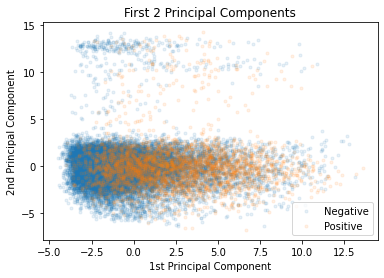

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

In [19]:
positive = data[labels==1]
negative = data[labels==0]

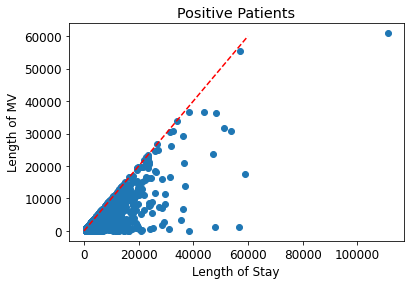

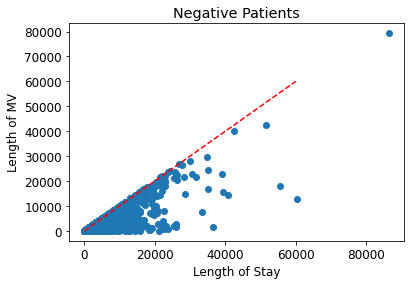

In [20]:
plt.figure()
plt.scatter(positive[positive["mv_duration"] != 0]["LOS"], positive[positive["mv_duration"] != 0]["mv_duration"])
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Length of Stay")
plt.ylabel("Length of MV")
plt.title("Positive Patients")
plt.show()

plt.figure()
plt.scatter(negative[negative["mv_duration"] != 0]["LOS"], negative[negative["mv_duration"] != 0]["mv_duration"])
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Length of Stay")
plt.ylabel("Length of MV")
plt.title("Negative Patients")
plt.show()

# Logistic Regression

In [12]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs".format(lead, obs, lead, obs), calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.025, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.03, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [13]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr".format(lead, obs), "wb") as f:
    pickle.dump(lr_calibrated, f)

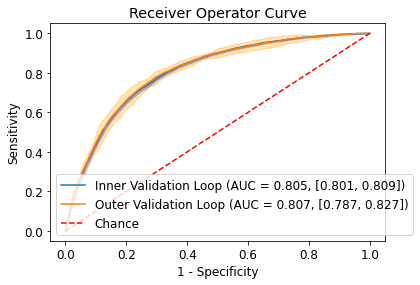

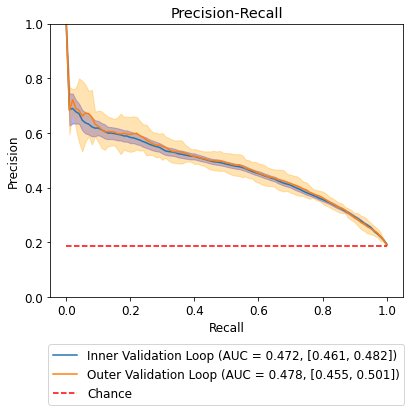

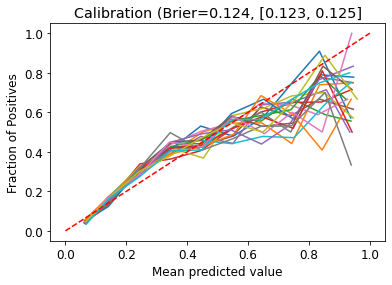

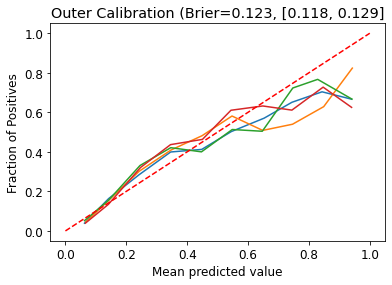

In [14]:
result_dict = lr_calibrated
name = "relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])

plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.02, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [16]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_selected_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(selected_feat, f)

131
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistCABG
HistHypertension
HistPCI
HistPulmEmb
HistHeartTransp
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
HistSteroid Use
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistSeizures
HistTIA
HistRespiratoryFail
HistRestrictiveDis
HistStoneDisease
HistRenalFail
HistRheumatic
relative_12hr_lead_1hr_obsAdrenergicBronchodilators
relative_12hr_lead_1hr_obsaminoglycosides
relative_12hr_lead_1hr_obsAnticholinergicBronchodilators
relative_12hr_lead_1hr_obsAnticholinergics
relative_12hr_lead_1hr_obsAnticoagulants
relative_12hr_lead_1hr_obsAntidiarrheals
relative_12hr_lead_1hr_obsAntihistamines
relative_12hr_lead_1hr_obsBarbiturates
relative_12hr_lead_1hr_obsBenzodiazepines
relative_12hr_lea

In [17]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(dropped_feat, f)

63
HistArrythmia
HistCHF
HistMI
HistPacemaker
HistPVD
HistValveDis
HistVenThromb
HistCushing
Histdiabetes
HistCirrhosis
HistHypersplenism
HistClottingDisorder
HistIntracranialMass
HistNeuromuscularDis
HistStrokes
HistAsthma
HistCOPD
HistLungTransp
HistSarcoidosis
HistNeurogenicBladd
HistRenalInsuff
HistRTA
HistRenalTransp
relative_12hr_lead_1hr_obsAcetaminophen
relative_12hr_lead_1hr_obsAntiemetics
relative_12hr_lead_1hr_obsCalciumChannelBlockers
relative_12hr_lead_1hr_obsClassVAntiarrhythmics
relative_12hr_lead_1hr_obsInsulins
relative_12hr_lead_1hr_obsLaxatives
relative_12hr_lead_1hr_obsMethylxanthines
relative_12hr_lead_1hr_obsNSAIDs
relative_12hr_lead_1hr_obsPotassiumChannelBlockers
relative_12hr_lead_1hr_obsSodiumChannelBlockers
relative_12hr_lead_1hr_obsSomatostatin
relative_12hr_lead_1hr_obsTricyclicAntidepressants
sofa_cardio
sofa_kidney
sofa_score
qsofa_sys_bp
qsofa_score
comorbidity_hypunc
comorbidity_para
comorbidity_diabc
comorbidity_hypothy
comorbidity_pud
comorbidity_aids

In [12]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl".format(lead, obs), "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [13]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

NameError: name 'LogisticRegression' is not defined

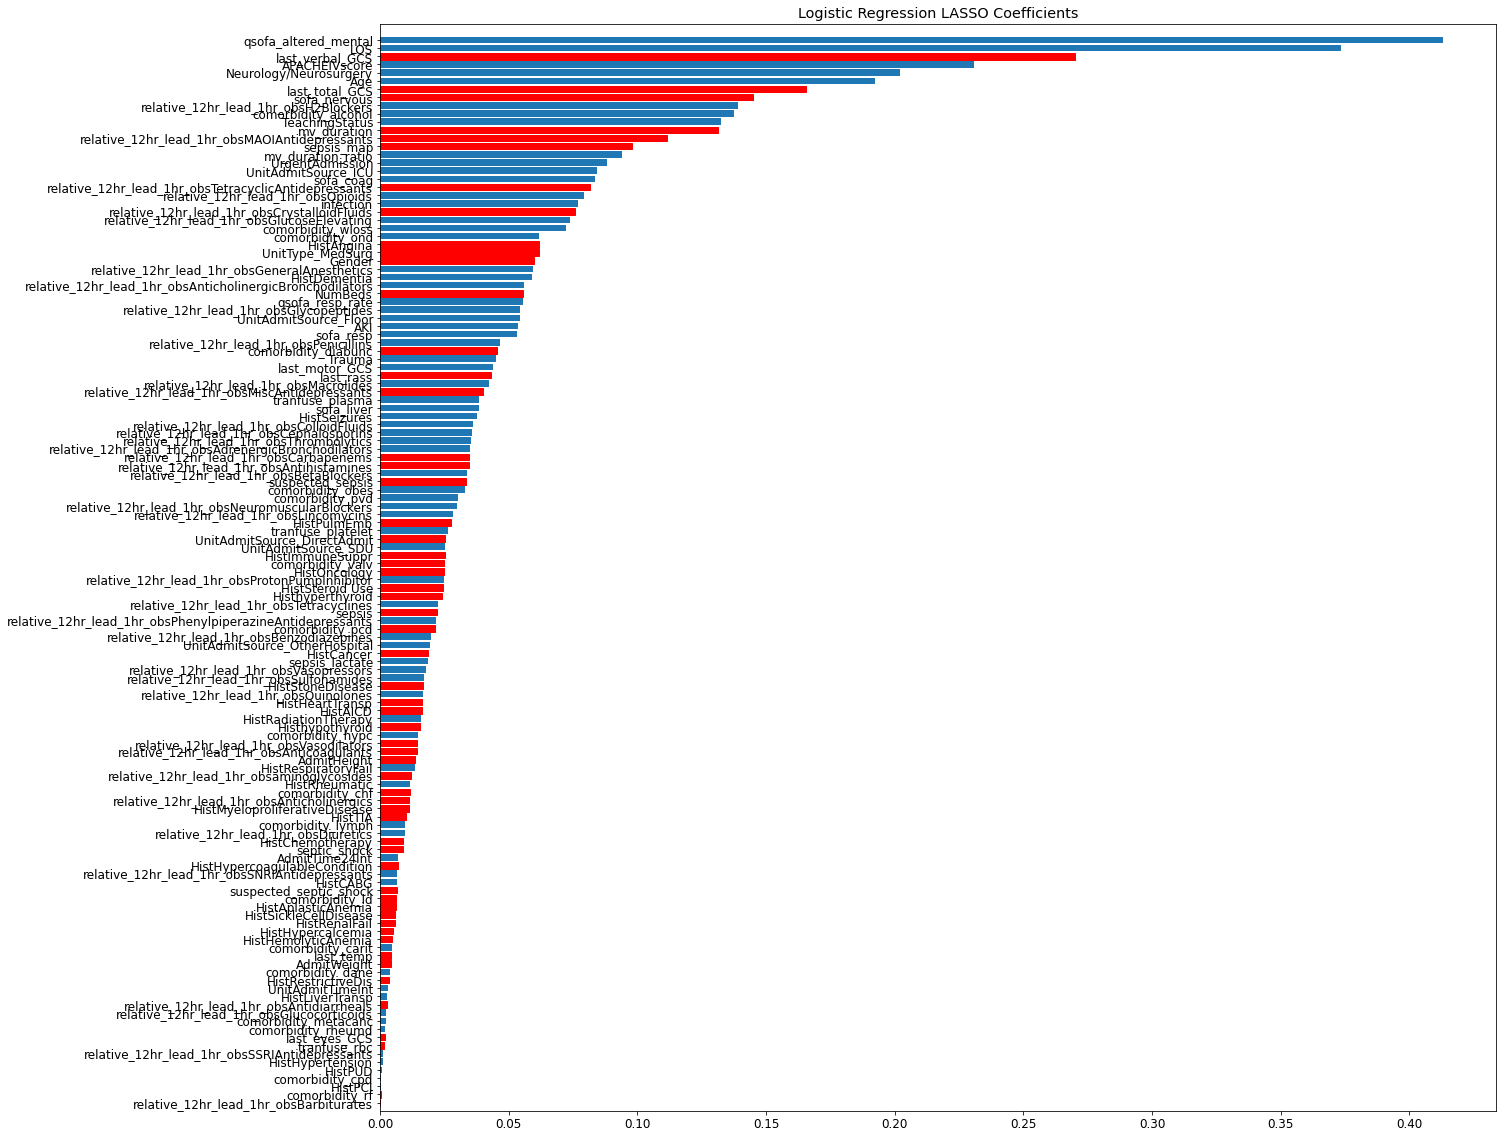

In [20]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

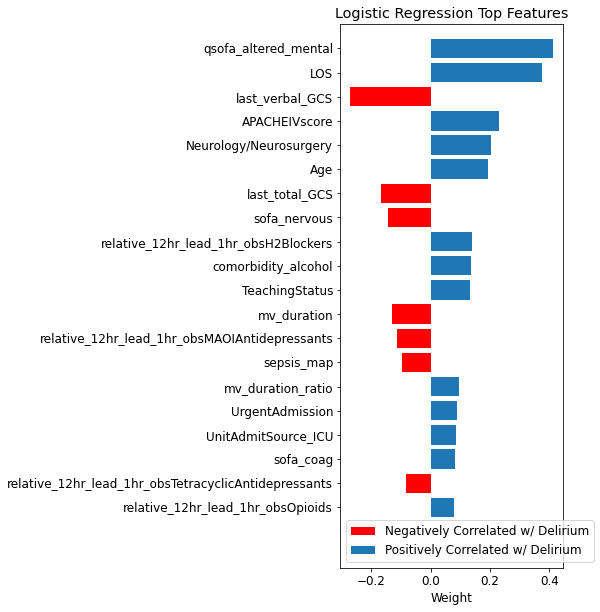

In [21]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "Stepdown Unit",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_coefficients_short.png'.format(lead, obs), dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

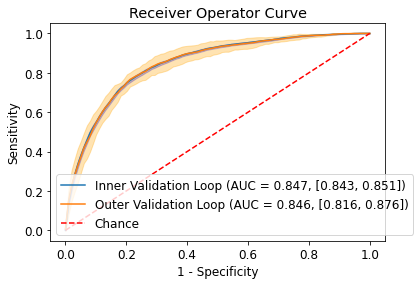

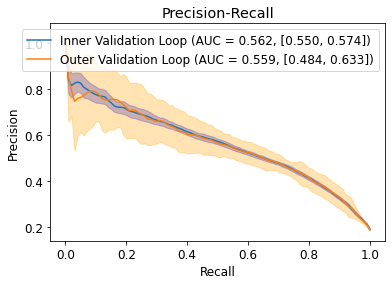

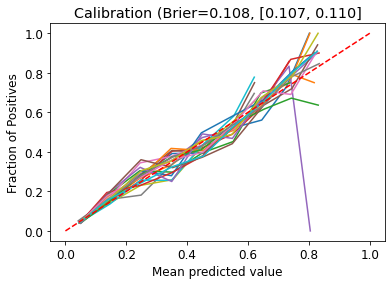

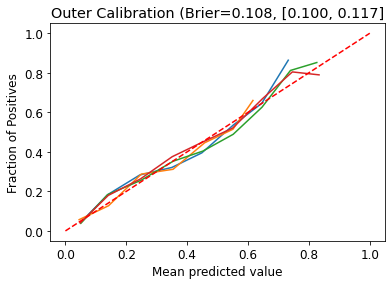

In [2]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_unpruned/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_3hr_lead_1hr_obs/mean_unpruned/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

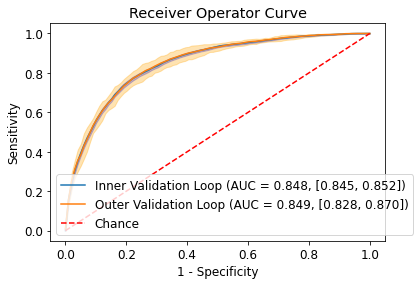

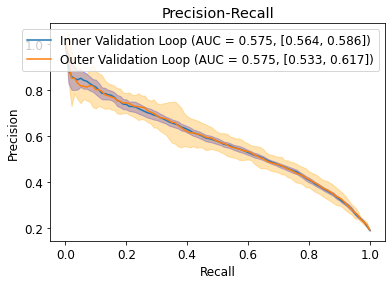

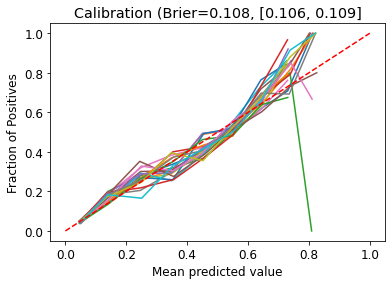

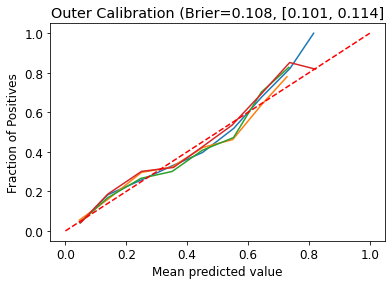

In [11]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_pruned/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_3hr_lead_1hr_obs/mean_pruned/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

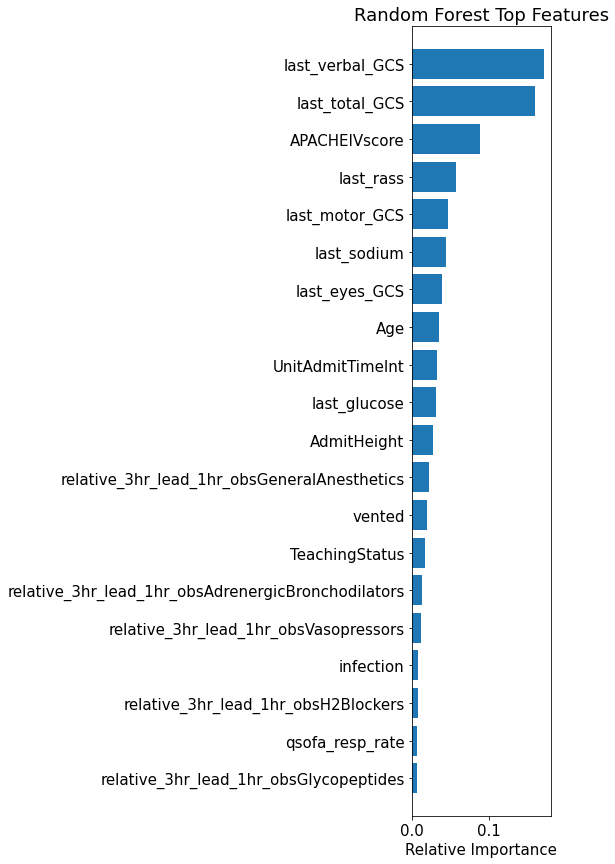

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

In [22]:
catboost_result = run_parallel_cross_validation(data, 
												"CatBoostClassifier",
												{"n_estimators": 3000},
												"from catboost import CatBoostClassifier",
												run_once = True,
												bayes=False,
												calibrate=True,
												n_jobs=2,
												run_id=5,
												outer_tuning=True,
												outer_labels=labels)

Inner Validation Complete


In [23]:
import pickle
with open("../pickle/relative_3hr_lead_1hr_obs/mean_unpruned/catboost", "wb") as f:
    pickle.dump(catboost_result, f)

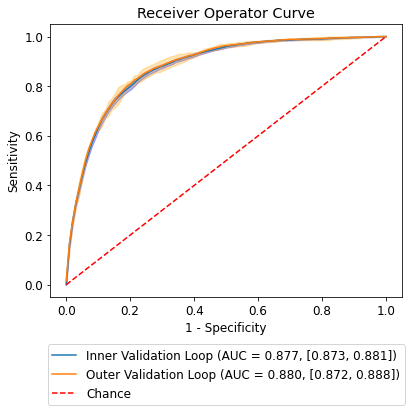

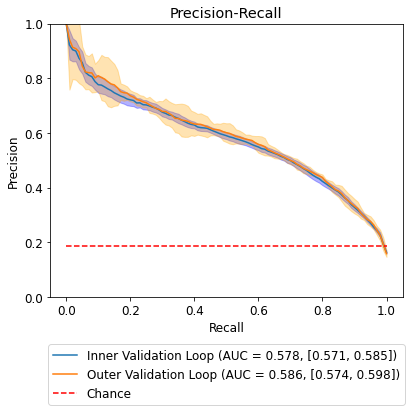

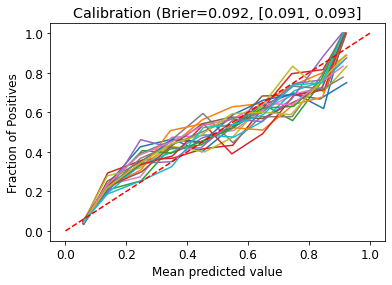

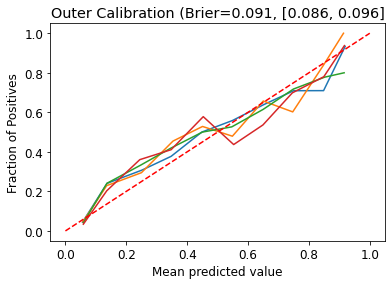

In [24]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_unpruned/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "relative_3hr_lead_1hr_obs/mean_unpruned/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()


C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator _SigmoidCalibration from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator CalibratedClassifierCV from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


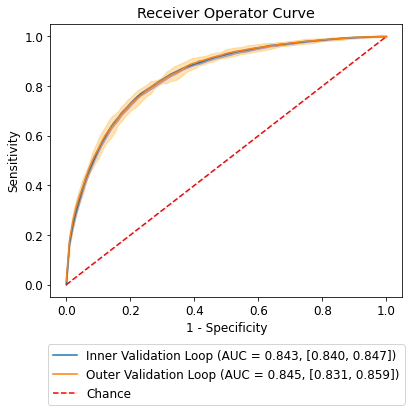

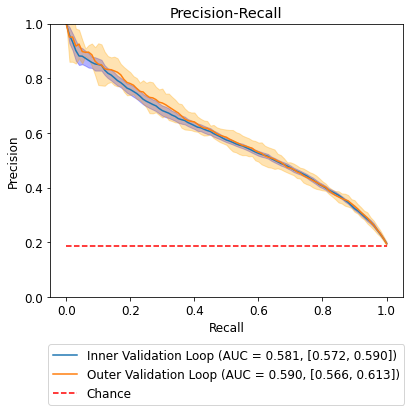

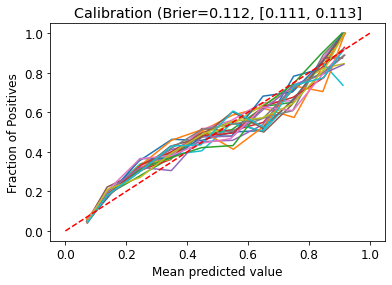

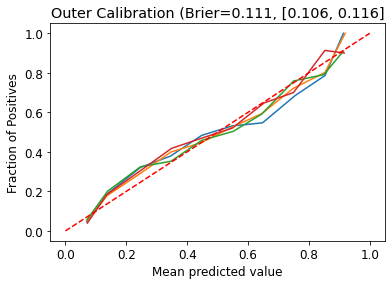

In [12]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_pruned/catboost_unbalanced".format(lead, obs), "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "relative_{}hr_lead_{}hr_obs/mean_pruned/catboost_unbalanced".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()


Outer Loop 0
Threshold: 0.46508121834041277
Specificity: 0.94525
Sensitivity: 0.38949671772428884
Outer Loop 1
Threshold: 0.4583383634973238
Specificity: 0.9453907815631263
Sensitivity: 0.4197396963123644
Outer Loop 2
Threshold: 0.44167346477715286
Specificity: 0.9458103361766181
Sensitivity: 0.4040948275862069
Outer Loop 3
Threshold: 0.42539784913818063
Specificity: 0.9455952083853256
Sensitivity: 0.4211686879823594


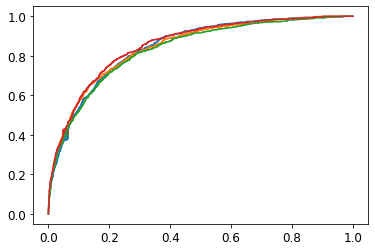

In [63]:
from sklearn import metrics

plt.figure()

for i in range(4):
    print("Outer Loop {}".format(i))
    fpr, tpr, thresholds = metrics.roc_curve(result_dict["olabels"][i], result_dict["ofullpred"][i])
    #print(thresholds)
    operating_point = np.argmin(abs(tpr-(1-fpr)))
    operating_point = 250
    print("Threshold: {}".format(thresholds[operating_point]))
    plt.plot(fpr, tpr)
    plt.scatter(fpr[operating_point], tpr[operating_point])

    print("Specificity: {}".format(1-fpr[operating_point]))
    print("Sensitivity: {}".format(tpr[operating_point]))

#plt.xlim([0.2, 0.3])
plt.show()

In [22]:
 result_dict["ofullpred"]

[array([0.86479478, 0.88047258, 0.76094926, ..., 0.43636665, 0.06939468,
        0.24108899]),
 array([0.30630305, 0.17027827, 0.36269765, ..., 0.69855642, 0.20190974,
        0.11006968]),
 array([0.64016753, 0.37636771, 0.72220431, ..., 0.17491154, 0.0676005 ,
        0.06482411]),
 array([0.90288521, 0.86081981, 0.63642859, ..., 0.08539713, 0.09577165,
        0.13812839])]